In [1]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal, pearsonr, kendalltau
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [2]:
# loading data from csvs
password = pd.read_csv('data/csvs/password.csv')
quest = pd.read_csv('data/csvs/quest.csv')
csquestquant = pd.read_csv('data/csvs/csquestquant.csv')
demo = pd.read_csv('data/csvs/demo.csv')
strategy = pd.read_csv('data/qualitative/strategy.csv')
# spassqual = pd.read_csv('data/qualitative/spassqual.csv')

display(password.head())
display(quest.head())
display(csquestquant.head())
display(demo.head())
display(strategy.head())


,Password Strength,Motivation After Design,Hard to Remember,Guessed by Hacker,Guessed by FnF,Stronger than Usual,Helpful,Easy to think memory,Difficult for num&char,Password Generation,Actual Strength,design
0,2,2,2,2,2,2,2,0,2,0.00,3.0,infographics
1,3,3,1,2,3,3,3,3,3,1.50,3.0,conversation
2,2,2,3,3,3,1,1,2,3,2.25,0.0,reflection
3,2,2,0,2,2,1,2,2,2,0.50,1.5,reflection
4,1,0,3,3,3,0,-2,1,1,0.00,-3.0,conversation


,Perspicuity,Aesthetics,Usefulness,Clarity,design
0,2.25,0.50,2.75,3.00,infographics
1,2.75,2.75,2.75,2.50,conversation
2,2.50,1.75,2.00,2.25,reflection
3,1.00,1.50,2.00,1.25,reflection
4,-1.25,-1.00,-1.75,-0.25,conversation


,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Engaging,Attractive,Informative,Creative,To the Point,Easy to understand,Real life motivation,Ease to follow pages,Reflection,design
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,infographics
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,0.0,conversation
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,reflection
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,reflection
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,0.0,-1.0,0.0,2.0,1.0,1.0,-1.0,1.0,0.0,conversation


,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adopt based on security expert advice,design
0,Woman,55-59 years old,"White,Human Caucasian European",Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6,infographics
1,Man,55-59 years old,White,Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Freelance,Self-taught,Self-taught,7,conversation
2,Woman,50-54 years old,White,High School Graduate,Business,Business or industry,Self-taught,Self-taught,6,reflection
3,Man,55-59 years old,White,High School Graduate,Construction,Business or industry,Self-taught,No experience,7,reflection
4,Man,30-34 years old,White,Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5,conversation


,8-1,design
0,I used a variation of the strategy presented i...,infographics
1,I used a variation of the strategy presented i...,conversation
2,I used a variation of the strategy presented i...,reflection
3,I used a variation of the strategy presented i...,reflection
4,I used a totally different strategy.,conversation


I used the same strategy presented in the design.              67
I used a variation of the strategy presented in the design.    27
I used a totally different strategy.                           10
Name: strategy, dtype: int64


<AxesSubplot:>

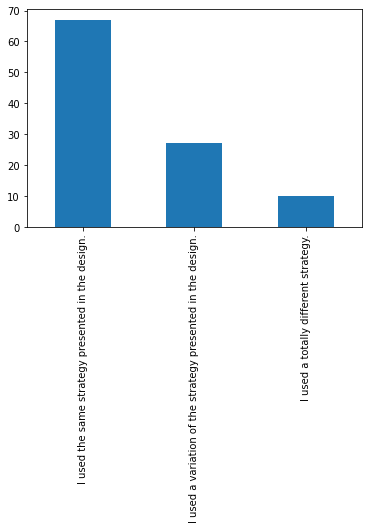

In [3]:
# Strategy
strategy.rename(columns = {'8-1': 'strategy'}, inplace=True)
print(strategy['strategy'].value_counts())
strategy['strategy'].value_counts().plot.bar()

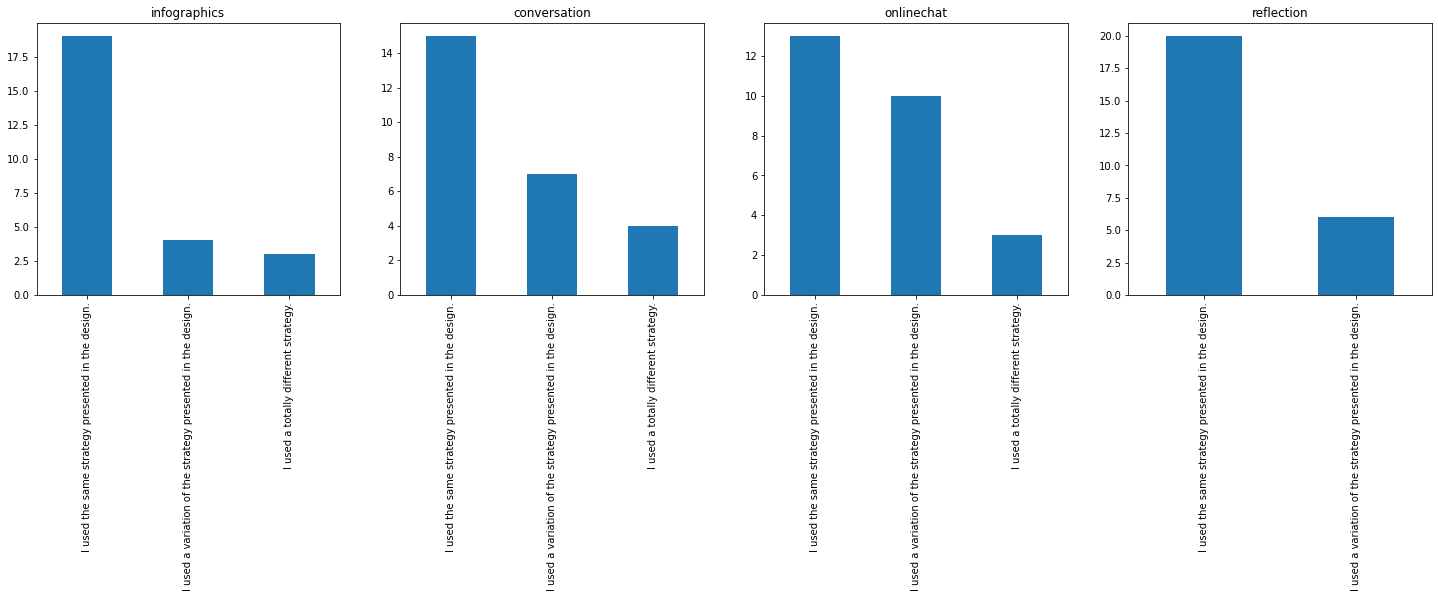

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, design in enumerate(did_map.values()):
    strategy[strategy['design']==design]['strategy'].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(f'{design}')


In [5]:
adopt = demo['adopt based on security expert advice'] - 4
# csquest_pass = csquestquant.join(password[['Motivation After Design', 'Hard to Remember', 'Guessed by Hacker', 'Helpful', 'Guessed by FnF', 'Actual Strength', 'Stronger than Usual']]).join(quest[['Perspicuity', 'Clarity']].join(adopt)).join(design)
csquest_pass = csquestquant.join(password[['Motivation After Design', 'Helpful', 'Stronger than Usual']]).join(quest[['Perspicuity', 'Clarity', 'Aesthetics', 'Usefulness']].join(adopt)).join(strategy['strategy'])

csquest_pass.head()

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,design,Motivation After Design,Helpful,Stronger than Usual,Perspicuity,Clarity,Aesthetics,Usefulness,adopt based on security expert advice,strategy
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,infographics,2,2,2,2.25,3.00,0.50,2.75,2,I used a variation of the strategy presented i...
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,conversation,3,3,3,2.75,2.50,2.75,2.75,3,I used a variation of the strategy presented i...
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,reflection,2,1,1,2.50,2.25,1.75,2.00,2,I used a variation of the strategy presented i...
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,reflection,2,2,1,1.00,1.25,1.50,2.00,3,I used a variation of the strategy presented i...
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,conversation,0,-2,0,-1.25,-0.25,-1.00,-1.75,1,I used a totally different strategy.


In [6]:
strategy_group = csquest_pass.groupby('strategy').mean()
strategy_group

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Ease to follow pages,Reflection,Motivation After Design,Helpful,Stronger than Usual,Perspicuity,Clarity,Aesthetics,Usefulness,adopt based on security expert advice
strategy,,,,,,,,,,,,,,,,,,,,,
I used a totally different strategy.,1.100000,0.300000,1.600000,0.400000,0.600000,0.700000,0.700000,0.300000,0.800000,0.400000,...,0.400000,0.000000,1.800000,0.300000,0.600000,0.425000,1.125000,0.375000,0.225000,1.500000
I used a variation of the strategy presented in the design.,1.407407,1.296296,1.777778,1.518519,1.962963,1.888889,2.000000,1.592593,1.000000,1.370370,...,0.962963,0.407407,2.074074,1.851852,1.333333,1.509259,1.712963,1.287037,1.361111,2.259259
I used the same strategy presented in the design.,1.746269,1.611940,1.910448,2.179104,1.925373,2.164179,2.134328,1.567164,1.014925,1.253731,...,1.179104,0.447761,1.955224,2.000000,1.552239,1.791045,1.947761,1.212687,1.869403,2.074627


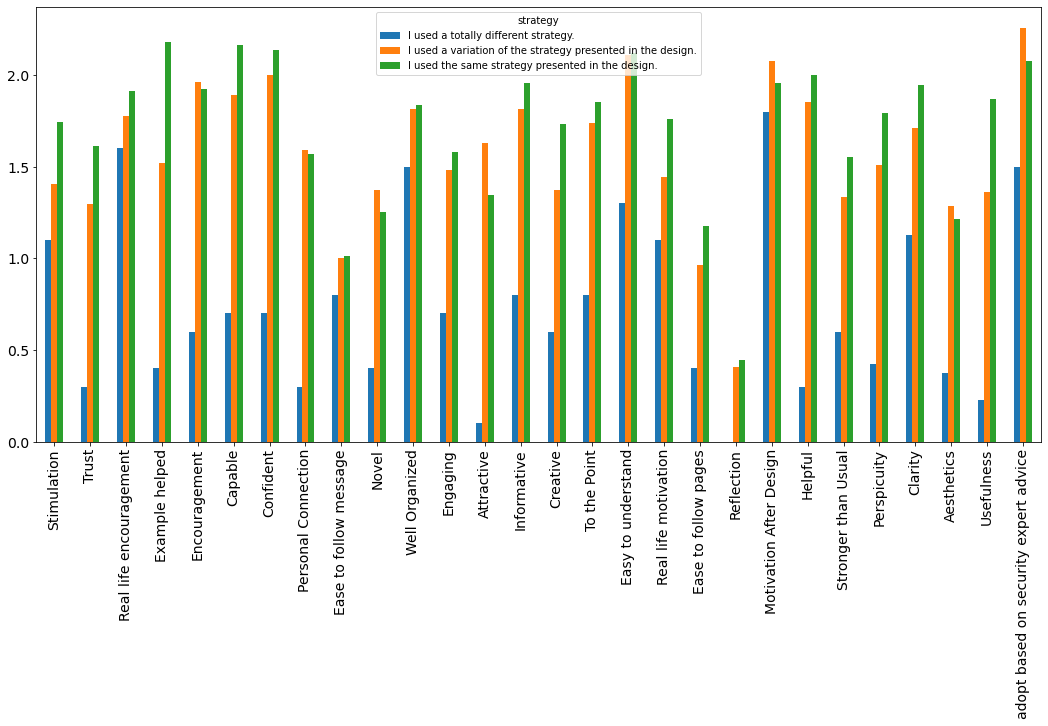

In [7]:
chart = strategy_group.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

In [8]:
all = csquest_pass.groupby('design').mean()
display(all['Engaging'])
all

design
conversation    1.576923
infographics    1.230769
onlinechat      1.230769
reflection      1.846154
Name: Engaging, dtype: float64

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Ease to follow pages,Reflection,Motivation After Design,Helpful,Stronger than Usual,Perspicuity,Clarity,Aesthetics,Usefulness,adopt based on security expert advice
design,,,,,,,,,,,,,,,,,,,,,
conversation,1.769231,1.500000,1.884615,2.076923,1.730769,2.153846,2.115385,1.615385,0.000000,1.038462,...,2.038462,0.000000,2.115385,1.884615,1.538462,1.701923,1.807692,1.538462,1.663462,2.115385
infographics,1.230769,1.038462,1.500000,1.884615,1.538462,1.692308,1.461538,1.076923,1.884615,0.961538,...,0.000000,0.000000,1.807692,1.923077,1.230769,1.336538,1.769231,0.480769,1.528846,1.961538
onlinechat,1.692308,1.500000,2.038462,1.384615,1.807692,1.884615,1.884615,1.423077,2.076923,1.346154,...,0.000000,0.000000,2.000000,1.538462,1.384615,1.346154,1.663462,1.153846,1.211538,2.076923
reflection,1.692308,1.576923,1.961538,2.000000,2.153846,2.076923,2.384615,1.692308,0.000000,1.461538,...,2.153846,1.576923,1.961538,1.846154,1.461538,1.961538,1.990385,1.432692,1.913462,2.115385


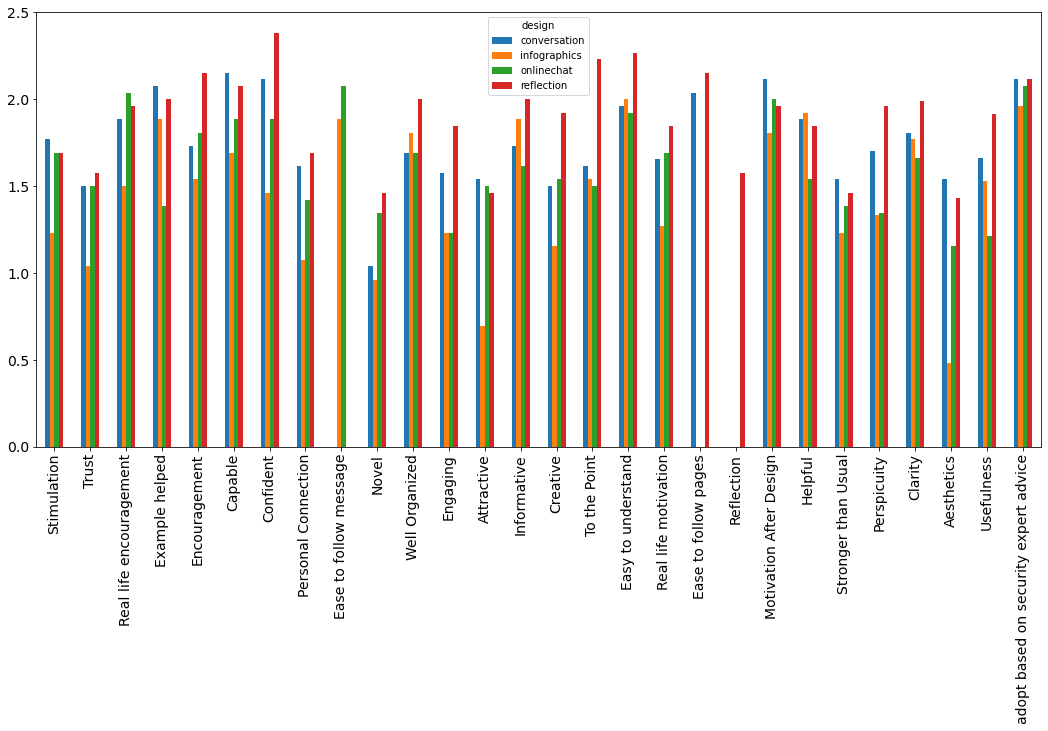

In [9]:
chart = all.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

In [10]:
csquest_pass

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,design,Motivation After Design,Helpful,Stronger than Usual,Perspicuity,Clarity,Aesthetics,Usefulness,adopt based on security expert advice,strategy
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,infographics,2,2,2,2.25,3.00,0.50,2.75,2,I used a variation of the strategy presented i...
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,conversation,3,3,3,2.75,2.50,2.75,2.75,3,I used a variation of the strategy presented i...
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,reflection,2,1,1,2.50,2.25,1.75,2.00,2,I used a variation of the strategy presented i...
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,reflection,2,2,1,1.00,1.25,1.50,2.00,3,I used a variation of the strategy presented i...
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,conversation,0,-2,0,-1.25,-0.25,-1.00,-1.75,1,I used a totally different strategy.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,1.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,3.0,...,reflection,2,2,2,3.00,3.00,3.00,3.00,2,I used a variation of the strategy presented i...
100,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,infographics,1,1,0,-0.75,-0.25,-1.00,-0.50,1,I used the same strategy presented in the design.
101,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,0.0,1.0,...,reflection,2,2,3,1.75,2.25,0.75,2.25,2,I used the same strategy presented in the design.
102,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,0.0,1.0,...,conversation,2,2,1,3.00,2.25,2.50,2.50,3,I used the same strategy presented in the design.


In [11]:
# fig, axes = plt.subplots(4, 7, figsize=(25, 6))
# for i, param in enumerate(quest_map):
#     sns.boxplot(data=csquest_pass, x='design', y=param, ax=axes[i])
#     sns.swarmplot(data=csquest_pass, x='design', y=param, ax=axes[i])
#     axes[i].set_ylabel('Rating')
#     axes[i].set_title(param)

In [12]:
print('------------------------------------------Correlation with UEQs------------------------------------------')

print('--------------Correlation with Perspicuity--------------')
print(f"Perspicuity Corr Aesthetics {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Aesthetics'])}")
print(f"Perspicuity Corr Usefulness {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Usefulness'])}")
print(f"Perspicuity Corr Clarity {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Clarity'])}")
print(f"Perspicuity Corr Engaging {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Engaging'])}")

print('--------------Correlation with Aesthetics--------------')
print(f"Aesthetics Corr Perspicuity {kendalltau(csquest_pass['Aesthetics'], csquest_pass['Perspicuity'])}")
print(f"Aesthetics Corr Usefulness {kendalltau(csquest_pass['Aesthetics'], csquest_pass['Usefulness'])}")
print(f"Aesthetics Corr Clarity {kendalltau(csquest_pass['Aesthetics'], csquest_pass['Clarity'])}")
print(f"Aesthetics Corr Engaging {kendalltau(csquest_pass['Aesthetics'], csquest_pass['Engaging'])}")

print('--------------Correlation with Usefulness--------------')
print(f"Usefulness Corr Aesthetics {kendalltau(csquest_pass['Usefulness'], csquest_pass['Aesthetics'])}")
print(f"Usefulness Corr Perspicuity {kendalltau(csquest_pass['Usefulness'], csquest_pass['Perspicuity'])}")
print(f"Usefulness Corr Clarity {kendalltau(csquest_pass['Usefulness'], csquest_pass['Clarity'])}")
print(f"Usefulness Corr Engaging {kendalltau(csquest_pass['Usefulness'], csquest_pass['Engaging'])}")

print('--------------Correlation with Clarity--------------')
print(f"Clarity Corr Aesthetics {kendalltau(csquest_pass['Clarity'], csquest_pass['Aesthetics'])}")
print(f"Clarity Corr Usefulness {kendalltau(csquest_pass['Clarity'], csquest_pass['Usefulness'])}")
print(f"Clarity Corr Perspicuity {kendalltau(csquest_pass['Clarity'], csquest_pass['Perspicuity'])}")
print(f"Clarity Corr Engaging {kendalltau(csquest_pass['Clarity'], csquest_pass['Engaging'])}")

print('--------------Correlation with Engaging--------------')
print(f"Engaging Corr Aesthetics {kendalltau(csquest_pass['Engaging'], csquest_pass['Aesthetics'])}")
print(f"Engaging Corr Usefulness {kendalltau(csquest_pass['Engaging'], csquest_pass['Usefulness'])}")
print(f"Engaging Corr Clarity {kendalltau(csquest_pass['Engaging'], csquest_pass['Clarity'])}")
print(f"Engaging Corr Perspicuity {kendalltau(csquest_pass['Engaging'], csquest_pass['Perspicuity'])}")


print('------------------------------------------Correlation with Impact on Password------------------------------------------')

print('--------------Correlation with Perspicuity--------------')
print(f"Perspicuity Corr Encouragement {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Encouragement'])}")
print(f"Perspicuity Corr Capable {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Capable'])}")
print(f"Perspicuity Corr Confident {kendalltau(csquest_pass['Perspicuity'], csquest_pass['Confident'])}")

print('--------------Correlation with Usefulness--------------')
print(f"Usefulness Corr Encouragement {kendalltau(csquest_pass['Usefulness'], csquest_pass['Encouragement'])}")
print(f"Usefulness Corr Capable {kendalltau(csquest_pass['Usefulness'], csquest_pass['Capable'])}")
print(f"Usefulness Corr Confident {kendalltau(csquest_pass['Usefulness'], csquest_pass['Confident'])}")

print('--------------Correlation with Personal Connection--------------')
print(f"Personal Connection Corr Encouragement {kendalltau(csquest_pass['Personal Connection'], csquest_pass['Encouragement'])}")
print(f"Personal Connection Corr Capable {kendalltau(csquest_pass['Personal Connection'], csquest_pass['Capable'])}")
print(f"Personal Connection Corr Confident {kendalltau(csquest_pass['Personal Connection'], csquest_pass['Confident'])}")
print(f"Personal Connection Corr Motivation After Design  {kendalltau(csquest_pass['Personal Connection'], csquest_pass['Motivation After Design'])}")
print(f"Personal Connection Corr Helpful  {kendalltau(csquest_pass['Personal Connection'], csquest_pass['Helpful'])}")

print('--------------Correlation with Stimulation--------------')
print(f"Stimulation Corr Encouragement {kendalltau(csquest_pass['Stimulation'], csquest_pass['Encouragement'])}")
print(f"Stimulation Corr Capable {kendalltau(csquest_pass['Stimulation'], csquest_pass['Capable'])}")
print(f"Stimulation Corr Confident {kendalltau(csquest_pass['Stimulation'], csquest_pass['Confident'])}")
print(f"Stimulation Corr Motivation After Design {kendalltau(csquest_pass['Stimulation'], csquest_pass['Motivation After Design'])}")
print(f"Stimulation Corr Helpful {kendalltau(csquest_pass['Stimulation'], csquest_pass['Helpful'])}")

print('--------------Correlation with Trust--------------')
print(f"Trust Corr Encouragement {kendalltau(csquest_pass['Trust'], csquest_pass['Encouragement'])}")
print(f"Trust Corr Capable {kendalltau(csquest_pass['Trust'], csquest_pass['Capable'])}")
print(f"Trust Corr Confident {kendalltau(csquest_pass['Trust'], csquest_pass['Confident'])}")
print(f"Trust Corr Motivation After Design {kendalltau(csquest_pass['Trust'], csquest_pass['Motivation After Design'])}")
print(f"Trust Corr Helpful {kendalltau(csquest_pass['Trust'], csquest_pass['Helpful'])}")

print('--------------Correlation with Real life encouragement--------------')
print(f"Real life encouragement Corr Encouragement {kendalltau(csquest_pass['Real life encouragement'], csquest_pass['Encouragement'])}")
print(f"Real life encouragement Corr Real life Encouragement {kendalltau(csquest_pass['Real life encouragement'], csquest_pass['Capable'])}")
print(f"Real life encouragement Corr Confident {kendalltau(csquest_pass['Real life encouragement'], csquest_pass['Confident'])}")
print(f"Real life encouragement Corr Motivation After Design {kendalltau(csquest_pass['Real life encouragement'], csquest_pass['Motivation After Design'])}")
print(f"Real life encouragement Corr Helpful {kendalltau(csquest_pass['Real life encouragement'], csquest_pass['Helpful'])}")

------------------------------------------Correlation with UEQs------------------------------------------
--------------Correlation with Perspicuity--------------
Perspicuity Corr Aesthetics KendalltauResult(correlation=0.5003567668657124, pvalue=1.7157200718154844e-12)
Perspicuity Corr Usefulness KendalltauResult(correlation=0.6519462882318079, pvalue=4.632957117617178e-20)
Perspicuity Corr Clarity KendalltauResult(correlation=0.7032944500056948, pvalue=1.0038723786827747e-22)
Perspicuity Corr Engaging KendalltauResult(correlation=0.29333597210943796, pvalue=0.00010812337439174036)
--------------Correlation with Aesthetics--------------
Aesthetics Corr Perspicuity KendalltauResult(correlation=0.5003567668657124, pvalue=1.7157200718154844e-12)
Aesthetics Corr Usefulness KendalltauResult(correlation=0.5118971665400048, pvalue=5.080168011867351e-13)
Aesthetics Corr Clarity KendalltauResult(correlation=0.43871864393039356, pvalue=8.32606494800557e-10)
Aesthetics Corr Engaging KendalltauRe

In [13]:
print('------------------------------------------Correlation with UEQs------------------------------------------')

print('--------------Correlation with Perspicuity--------------')
print(f"Perspicuity Corr Aesthetics {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Aesthetics'])}")
print(f"Perspicuity Corr Usefulness {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Usefulness'])}")
print(f"Perspicuity Corr Clarity {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Clarity'])}")
print(f"Perspicuity Corr Engaging {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Engaging'])}")

print('--------------Correlation with Aesthetics--------------')
print(f"Aesthetics Corr Perspicuity {pearsonr(csquest_pass['Aesthetics'], csquest_pass['Perspicuity'])}")
print(f"Aesthetics Corr Usefulness {pearsonr(csquest_pass['Aesthetics'], csquest_pass['Usefulness'])}")
print(f"Aesthetics Corr Clarity {pearsonr(csquest_pass['Aesthetics'], csquest_pass['Clarity'])}")
print(f"Aesthetics Corr Engaging {pearsonr(csquest_pass['Aesthetics'], csquest_pass['Engaging'])}")

print('--------------Correlation with Usefulness--------------')
print(f"Usefulness Corr Aesthetics {pearsonr(csquest_pass['Usefulness'], csquest_pass['Aesthetics'])}")
print(f"Usefulness Corr Perspicuity {pearsonr(csquest_pass['Usefulness'], csquest_pass['Perspicuity'])}")
print(f"Usefulness Corr Clarity {pearsonr(csquest_pass['Usefulness'], csquest_pass['Clarity'])}")
print(f"Usefulness Corr Engaging {pearsonr(csquest_pass['Usefulness'], csquest_pass['Engaging'])}")

print('--------------Correlation with Clarity--------------')
print(f"Clarity Corr Aesthetics {pearsonr(csquest_pass['Clarity'], csquest_pass['Aesthetics'])}")
print(f"Clarity Corr Usefulness {pearsonr(csquest_pass['Clarity'], csquest_pass['Usefulness'])}")
print(f"Clarity Corr Perspicuity {pearsonr(csquest_pass['Clarity'], csquest_pass['Perspicuity'])}")
print(f"Clarity Corr Engaging {pearsonr(csquest_pass['Clarity'], csquest_pass['Engaging'])}")

print('--------------Correlation with Engaging--------------')
print(f"Engaging Corr Aesthetics {pearsonr(csquest_pass['Engaging'], csquest_pass['Aesthetics'])}")
print(f"Engaging Corr Usefulness {pearsonr(csquest_pass['Engaging'], csquest_pass['Usefulness'])}")
print(f"Engaging Corr Clarity {pearsonr(csquest_pass['Engaging'], csquest_pass['Clarity'])}")
print(f"Engaging Corr Perspicuity {pearsonr(csquest_pass['Engaging'], csquest_pass['Perspicuity'])}")


print('------------------------------------------Correlation with Impact on Password------------------------------------------')

print('--------------Correlation with Perspicuity--------------')
print(f"Perspicuity Corr Encouragement {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Encouragement'])}")
print(f"Perspicuity Corr Capable {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Capable'])}")
print(f"Perspicuity Corr Confident {pearsonr(csquest_pass['Perspicuity'], csquest_pass['Confident'])}")

print('--------------Correlation with Usefulness--------------')
print(f"Usefulness Corr Encouragement {pearsonr(csquest_pass['Usefulness'], csquest_pass['Encouragement'])}")
print(f"Usefulness Corr Capable {pearsonr(csquest_pass['Usefulness'], csquest_pass['Capable'])}")
print(f"Usefulness Corr Confident {pearsonr(csquest_pass['Usefulness'], csquest_pass['Confident'])}")

print('--------------Correlation with Personal Connection--------------')
print(f"Personal Connection Corr Encouragement {pearsonr(csquest_pass['Personal Connection'], csquest_pass['Encouragement'])}")
print(f"Personal Connection Corr Capable {pearsonr(csquest_pass['Personal Connection'], csquest_pass['Capable'])}")
print(f"Personal Connection Corr Confident {pearsonr(csquest_pass['Personal Connection'], csquest_pass['Confident'])}")
print(f"Personal Connection Corr Motivation After Design  {pearsonr(csquest_pass['Personal Connection'], csquest_pass['Motivation After Design'])}")
print(f"Personal Connection Corr Helpful  {pearsonr(csquest_pass['Personal Connection'], csquest_pass['Helpful'])}")

print('--------------Correlation with Stimulation--------------')
print(f"Stimulation Corr Encouragement {pearsonr(csquest_pass['Stimulation'], csquest_pass['Encouragement'])}")
print(f"Stimulation Corr Capable {pearsonr(csquest_pass['Stimulation'], csquest_pass['Capable'])}")
print(f"Stimulation Corr Confident {pearsonr(csquest_pass['Stimulation'], csquest_pass['Confident'])}")
print(f"Stimulation Corr Motivation After Design {pearsonr(csquest_pass['Stimulation'], csquest_pass['Motivation After Design'])}")
print(f"Stimulation Corr Helpful {pearsonr(csquest_pass['Stimulation'], csquest_pass['Helpful'])}")

print('--------------Correlation with Trust--------------')
print(f"Trust Corr Encouragement {pearsonr(csquest_pass['Trust'], csquest_pass['Encouragement'])}")
print(f"Trust Corr Capable {pearsonr(csquest_pass['Trust'], csquest_pass['Capable'])}")
print(f"Trust Corr Confident {pearsonr(csquest_pass['Trust'], csquest_pass['Confident'])}")
print(f"Trust Corr Motivation After Design {pearsonr(csquest_pass['Trust'], csquest_pass['Motivation After Design'])}")
print(f"Trust Corr Helpful {pearsonr(csquest_pass['Trust'], csquest_pass['Helpful'])}")

print('--------------Correlation with Real life encouragement--------------')
print(f"Real life encouragement Corr Encouragement {pearsonr(csquest_pass['Real life encouragement'], csquest_pass['Encouragement'])}")
print(f"Real life encouragement Corr Real life Encouragement {pearsonr(csquest_pass['Real life encouragement'], csquest_pass['Capable'])}")
print(f"Real life encouragement Corr Confident {pearsonr(csquest_pass['Real life encouragement'], csquest_pass['Confident'])}")
print(f"Real life encouragement Corr Motivation After Design {pearsonr(csquest_pass['Real life encouragement'], csquest_pass['Motivation After Design'])}")
print(f"Real life encouragement Corr Helpful {pearsonr(csquest_pass['Real life encouragement'], csquest_pass['Helpful'])}")

------------------------------------------Correlation with UEQs------------------------------------------
--------------Correlation with Perspicuity--------------
Perspicuity Corr Aesthetics (0.6270921713909228, 1.0634475224187298e-12)
Perspicuity Corr Usefulness (0.7320395203369973, 1.0630431867496705e-18)
Perspicuity Corr Clarity (0.8501534750645808, 3.556858584722186e-30)
Perspicuity Corr Engaging (0.3045721191476045, 0.001669188648530219)
--------------Correlation with Aesthetics--------------
Aesthetics Corr Perspicuity (0.6270921713909228, 1.0634475224187298e-12)
Aesthetics Corr Usefulness (0.5457143806769151, 2.087508582892867e-09)
Aesthetics Corr Clarity (0.5639004747678409, 4.574672833325608e-10)
Aesthetics Corr Engaging (0.45647845350326416, 1.1144756223112285e-06)
--------------Correlation with Usefulness--------------
Usefulness Corr Aesthetics (0.5457143806769151, 2.087508582892867e-09)
Usefulness Corr Perspicuity (0.7320395203369973, 1.0630431867496705e-18)
Usefulness Cor

In [14]:
test = {}
designs = []
quests = csquest_pass.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquest_pass[csquest_pass['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

In [15]:
# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Stimulation: KruskalResult(statistic=1.4917385572531041, pvalue=0.6841783755251889)
Trust: KruskalResult(statistic=1.0477643321438792, pvalue=0.7896965327872166)
Real life encouragement: KruskalResult(statistic=0.6490295695593452, pvalue=0.8851220246590592)
Example helped: KruskalResult(statistic=7.44507353247318, pvalue=0.058986670867872286)
Encouragement: KruskalResult(statistic=1.5525204328466617, pvalue=0.6702027491816334)
Capable: KruskalResult(statistic=3.3890169494941267, pvalue=0.3354440629843259)
Confident: KruskalResult(statistic=4.159873875815915, pvalue=0.24471010190815018)
Personal Connection: KruskalResult(statistic=1.4213407919384557, pvalue=0.7005400440250553)
Ease to follow message: KruskalResult(statistic=72.97972125132108, pvalue=9.81813930774536e-16)
Novel: KruskalResult(statistic=2.8295304979164646, pvalue=0.4186617143266056)
Well Organized: KruskalResult(statistic=2.3796657857806567, pvalue=0.4974310543678969)
Engaging: KruskalResult(statistic=3.9256215096378635, 

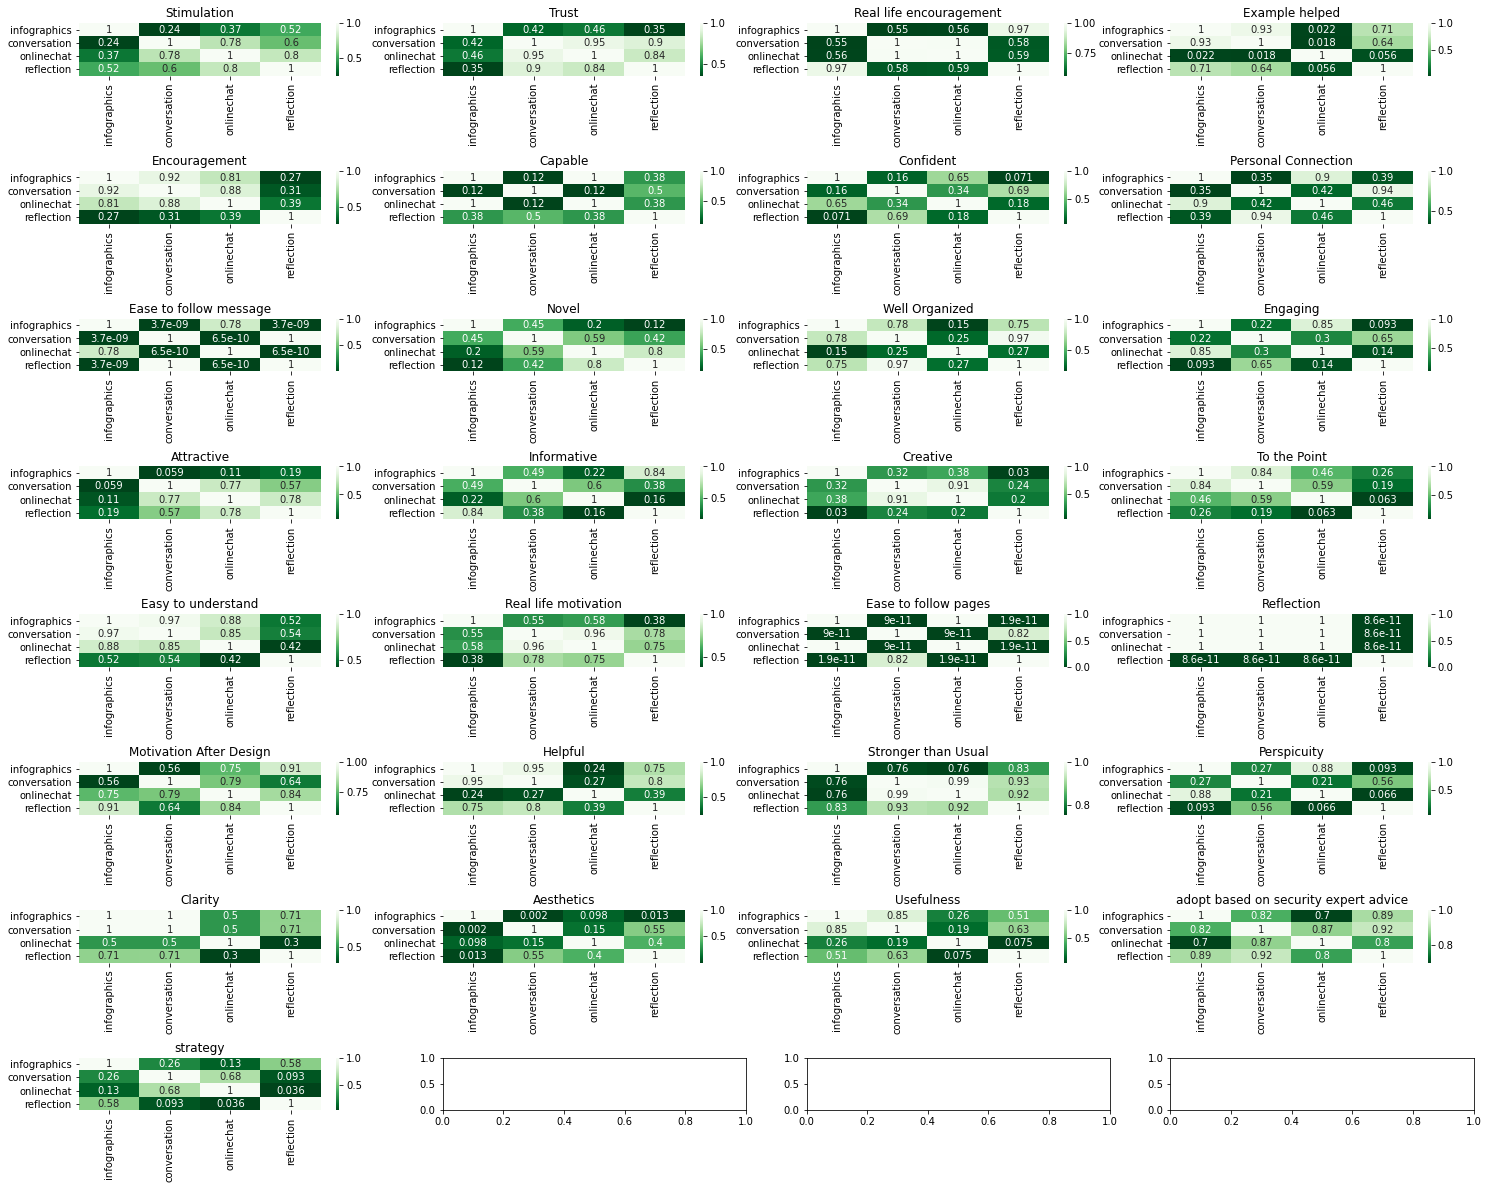

In [16]:
nrows, ncols = 8, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 20))
fig.subplots_adjust(hspace=1.8)

k=0
for i in range(nrows):
    for j in range(ncols):
        if k < len(quests):
            data = sp.posthoc_dunn(test[quests[k]])
            data.index = data.index.map(get_design)
            data.columns = data.columns.map(get_design)
            sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
            axes[i][j].set_title(quests[k])
            k += 1

<AxesSubplot:>

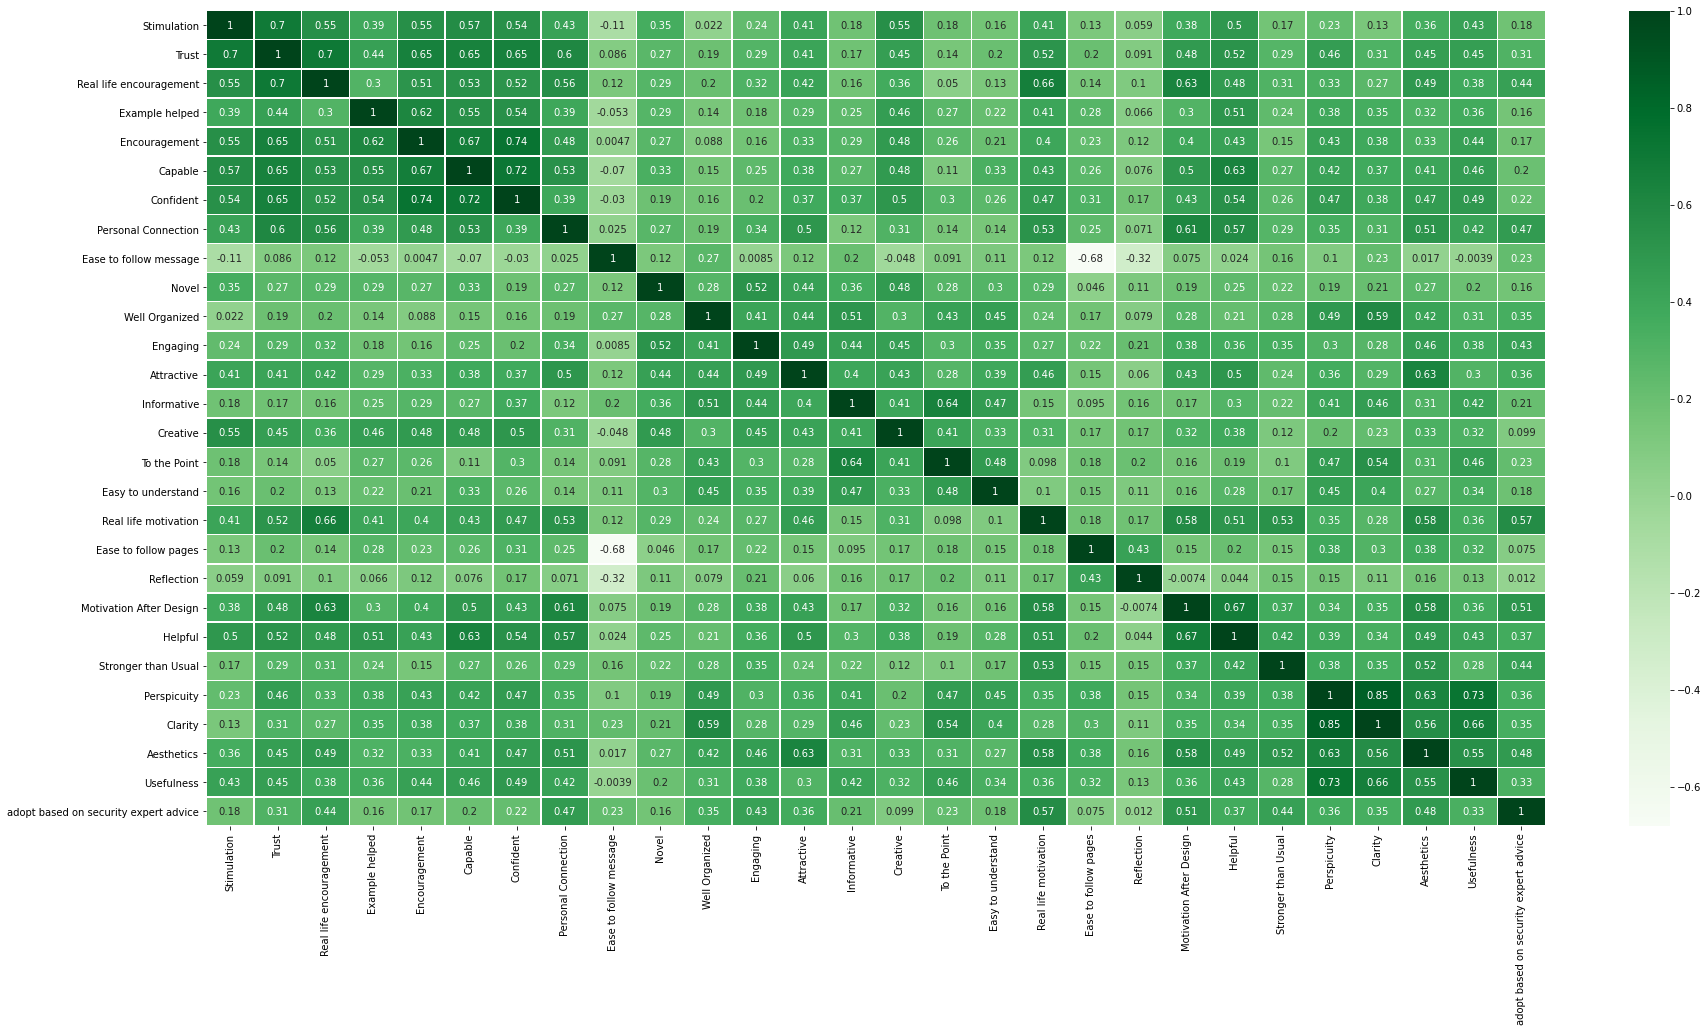

In [17]:
cormat = csquest_pass.corr(method='pearson')

fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

## Relationship between experience and password strength

In [18]:
temp_demo_field = ['gender', 'age', 'highest education']
temp_pass_field = ['Password Strength', 'Actual Strength']
exp_passstrength = password[temp_pass_field].join(demo[temp_demo_field])
exp_passstrength.head()

,Password Strength,Actual Strength,gender,age,highest education
0,2,3.0,Woman,55-59 years old,Four-year College Degree
1,3,3.0,Man,55-59 years old,Four-year College Degree
2,2,0.0,Woman,50-54 years old,High School Graduate
3,2,1.5,Man,55-59 years old,High School Graduate
4,1,-3.0,Man,30-34 years old,Four-year College Degree


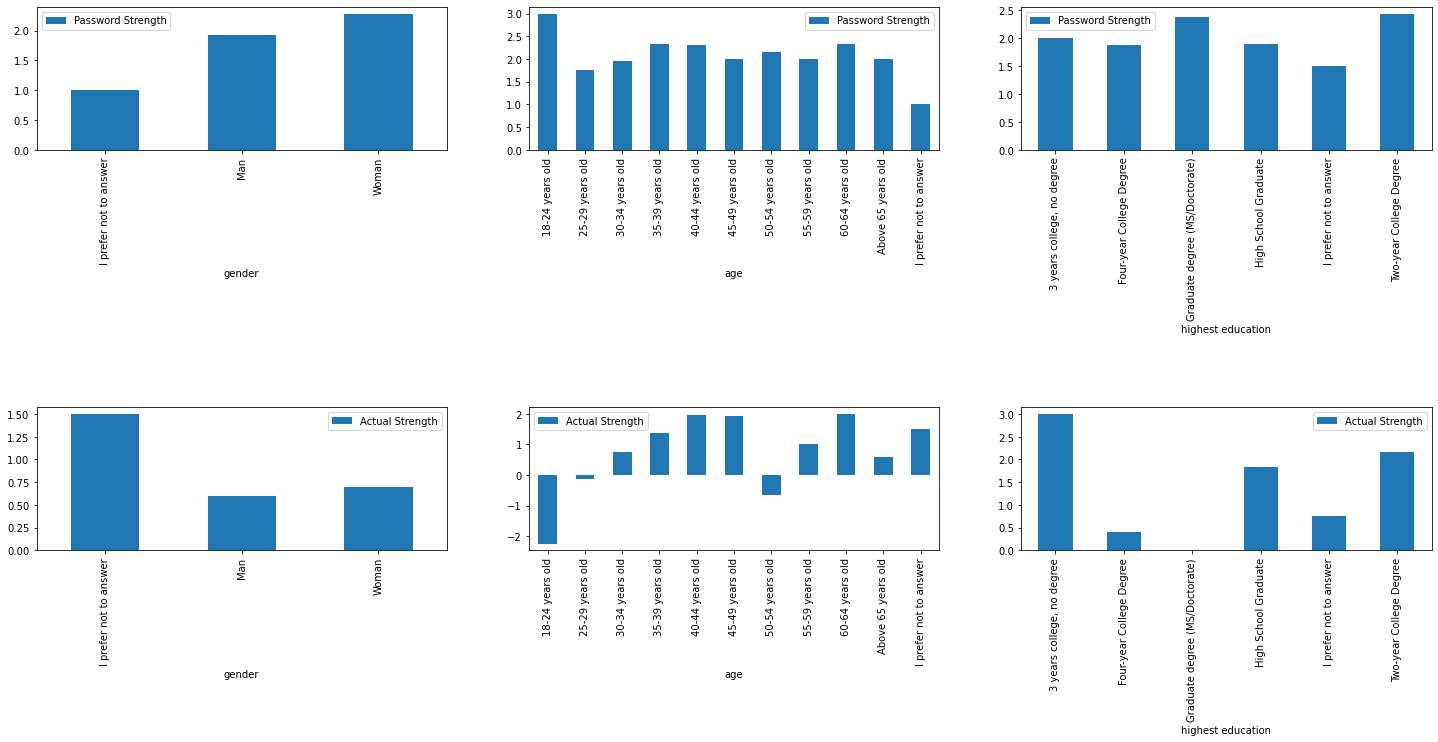

In [19]:
fig, axes = plt.subplots(len(temp_pass_field), len(temp_demo_field), figsize=(25, 10))
fig.subplots_adjust(hspace=1.8)

for i, tpass in enumerate(temp_pass_field):
    for j, tdemo in enumerate(temp_demo_field):
        exp_passstrength.groupby(tdemo)[tpass].mean().to_frame().plot.bar(ax=axes[i][j])

In [20]:
demo_list = ['age', 'gender', 'highest education']
csquest_list = ['Personal Connection', 'Real life motivation']

temp_demo = demo[demo_list].copy()
temp_demo['age'] = temp_demo['age'].str.strip('years old').str.strip()
temp_csquest = csquestquant[csquest_list].copy()

demo_csquest = temp_demo.join(temp_csquest)

In [21]:
# Age analysis
young_group = ['18-24', '25-29', '30-34', '35-39']

young = demo_csquest[demo_csquest['age'].apply(lambda x: x in young_group)]
old = demo_csquest[demo_csquest['age'].apply(lambda x: x not in young_group)]

print(f'Young: {len(young)}; Old: {len(old)}')

for cat in csquest_list:
    k = kruskal(young[cat], old[cat])
    print(f'{cat}: {k}')

Young: 65; Old: 39
Personal Connection: KruskalResult(statistic=2.6011331660945425, pvalue=0.10678733778108004)
Real life motivation: KruskalResult(statistic=0.32389867247567244, pvalue=0.5692740518810291)


In [22]:
# Gender analysis

male = demo_csquest[demo_csquest['gender']=='Man']
female = demo_csquest[demo_csquest['gender']=='Woman']

print(f'Male: {len(male)}; Female: {len(female)}')

for cat in csquest_list:
    k = kruskal(male[cat], female[cat])
    print(f'{cat}: {k}')

Male: 75; Female: 28
Personal Connection: KruskalResult(statistic=15.247040922605752, pvalue=9.432442119282691e-05)
Real life motivation: KruskalResult(statistic=4.747086640829795, pvalue=0.029347941160085246)


In [23]:
# Education Analysis
educated_group = ['Four-year College Degree', 'Graduate degree (MS/Doctorate)']

educated = demo_csquest[demo_csquest['highest education'].apply(lambda x: x in educated_group)]
uneducated = demo_csquest[demo_csquest['highest education'].apply(lambda x: x not in educated_group)]

print(f'Educated: {len(educated)}; Uneducated: {len(uneducated)}')

for cat in csquest_list:
    k = kruskal(educated[cat], uneducated[cat])
    print(f'{cat}: {k}')

Educated: 83; Uneducated: 21
Personal Connection: KruskalResult(statistic=1.4295386185741756, pvalue=0.23183975092544434)
Real life motivation: KruskalResult(statistic=0.7037041237389832, pvalue=0.4015418471102917)


In [24]:
# questcs = csquestquant.join(password['Motivation After Design']).join(password['Actual Strength']).join(password['Stronger than Usual']).join(quest['Perspicuity']).join(quest['Clarity'])
# csquest_pass.head(2)

### Above Average Grouping - Personal/Emotional Connection, Fear Appeal, Real life motivation, Engaging, Perspicuity

In [25]:
csquest_pass.head(2)

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,design,Motivation After Design,Helpful,Stronger than Usual,Perspicuity,Clarity,Aesthetics,Usefulness,adopt based on security expert advice,strategy
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,infographics,2,2,2,2.25,3.0,0.50,2.75,2,I used a variation of the strategy presented i...
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,conversation,3,3,3,2.75,2.5,2.75,2.75,3,I used a variation of the strategy presented i...


In [26]:
cats = ['Perspicuity', 'Usefulness', 'Personal Connection', 'Stimulation', 'Trust', 'Real life encouragement', 'Encouragement', 'Capable', 'Confident', 'Motivation After Design', 'Helpful']
temp = csquest_pass[cats]

for cat1 in cats:
    for cat2 in cats:
        if cat1 != cat2:
            print(f'{cat1} ({cat2})')
            above_average_cat = temp[temp[cat1] > 0][[cat1, cat2]]
            below_average_cat= temp[temp[cat1] <= 0][[cat1, cat2]]
            print(f'Above average count: {len(above_average_cat)}; Below average count: {len(below_average_cat)}')
            group = [above_average_cat[cat2], below_average_cat[cat2]]
            print(f'{kruskal(*group)}')
            print('-'*10)

Perspicuity (Usefulness)
Above average count: 88; Below average count: 16
KruskalResult(statistic=13.332560477508684, pvalue=0.00026083711413887916)
----------
Perspicuity (Personal Connection)
Above average count: 88; Below average count: 16
KruskalResult(statistic=4.867385664281192, pvalue=0.02736893303998773)
----------
Perspicuity (Stimulation)
Above average count: 88; Below average count: 16
KruskalResult(statistic=0.09362361343826038, pvalue=0.7596200564757927)
----------
Perspicuity (Trust)
Above average count: 88; Below average count: 16
KruskalResult(statistic=5.474788735717488, pvalue=0.019292692493271965)
----------
Perspicuity (Real life encouragement)
Above average count: 88; Below average count: 16
KruskalResult(statistic=4.373881653703681, pvalue=0.03649377053260774)
----------
Perspicuity (Encouragement)
Above average count: 88; Below average count: 16
KruskalResult(statistic=3.5181359453804615, pvalue=0.06070068118279287)
----------
Perspicuity (Capable)
Above average 